# Airbnb Data Analysis for New York

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, fbeta_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.dates as mdates
import datetime
import seaborn as sns

%matplotlib inline

## 1. Business Understanding

The insights I hope to get from this analysis are included in the below questions...
1. Where are the best locations to book an Airbnb in NYC?
2. What are the most cost effective months to travel to NYC?
3. How far in advance should you brook your trip to NYC?
4. What Airbnb listing features most influence price?

Answering the above questions will hopefully provide general guidlines to follow when booking an Airbnb in New York City regarless of what someone's budget may be.

## 2. Data Understanding

In this analysis, we will try to get a better understanding of how prices for Airbnb listings in New York are determined. A robust library of Airbnb data for cities all over the world could be found [here](http://insideairbnb.com/get-the-data.html).

Scrolling down to the New York City section in the above link, we can see that the following datasets are availle to download.
 - listings
 - calendar
 - reviews
 - neighbourhoods
 
For this analysis, since the primary focus is on price and effects on price, the `listings` and `calendar` datasets will be all that is needed. In order to get a better understanding of price trends, I will gather data for the past two years.

#### 2.1 Collect Data

In [4]:
# Load in csv files
calendar2017_df = pd.read_csv('calendar2017.csv')
calendar2018_df = pd.read_csv('calendar2018.csv')
listings2017_df = pd.read_csv('listings_detailed2017.csv')
listings2018_df = pd.read_csv('listings_detailed2018.csv')

C:\Users\giust\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\giust\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### 2.2 Describe Data

**calendar_df** - Detailed Calendar Data for listings in New York City

In [5]:
calendar2017_df.head()

,listing_id,date,available,price
0,2515,2018-09-01,t,$89.00
1,2515,2018-05-08,t,$89.00
2,2515,2018-05-07,t,$89.00
3,2515,2018-05-06,t,$89.00
4,2515,2018-05-05,t,$89.00


In [6]:
calendar2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15022305 entries, 0 to 15022304
Data columns (total 4 columns):
listing_id    int64
date          object
available     object
price         object
dtypes: int64(1), object(3)
memory usage: 458.4+ MB


In [7]:
calendar2017_df.describe()

,listing_id
count,1.502230e+07
mean,1.077453e+07
std,6.130787e+06
min,2.515000e+03
25%,5.506020e+06
50%,1.109859e+07
75%,1.621809e+07
max,2.019721e+07


In [203]:
calendar2018_df.head()

,listing_id,date,available,price
0,14314,2019-09-07,t,$154.00
1,14314,2019-09-06,t,$154.00
2,14314,2019-09-05,t,$144.00
3,14314,2019-09-04,t,$144.00
4,14314,2019-09-03,t,$144.00


In [204]:
calendar2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18330300 entries, 0 to 18330299
Data columns (total 4 columns):
listing_id    int64
date          object
available     object
price         object
dtypes: int64(1), object(3)
memory usage: 559.4+ MB


In [8]:
calendar2018_df.describe()

,listing_id
count,1.833030e+07
mean,1.497282e+07
std,8.337879e+06
min,2.515000e+03
25%,7.819687e+06
50%,1.580019e+07
75%,2.201577e+07
max,2.837234e+07


Both `calendar_df` datasets for 2017 & 2018 contain the same fields and share the same data types, so no cleaning is necessary to do before merging the two datasets

> **calendar_df (2017 & 2018) - To Clean**
- merge 2017 and 2018 data
- **listing_id** - change type to string
- **date** - change type to datetime
- **available** - update type to boolean 1/0
- **price** - change type to float

#### listings_df

Detailed Listings data for New York City

In [17]:
listings2017_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,17568601,https://www.airbnb.com/rooms/17568601,20170902070356,2017-09-03,Huge Sunny Room in Prime Brooklyn Flushing Ave JM,Hi there We occupy the entire first floor of a...,NaN,Hi there We occupy the entire first floor of a...,none,This is PRIME Bushwick area. 15 minute walk to...,...,f,NaN,NaN,f,NaN,flexible,f,f,1,1.03
1,14020260,https://www.airbnb.com/rooms/14020260,20170902070356,2017-09-03,1 Bedroom in north Bedstuy,"My place is close to king noodle, Bizarre, Hap...",NaN,"My place is close to king noodle, Bizarre, Hap...",none,NaN,...,f,NaN,NaN,t,NaN,moderate,f,f,1,0.55
2,422318,https://www.airbnb.com/rooms/422318,20170902070356,2017-09-03,NYC-Brooklyn #2 18 min to Manhattan,NaN,This private room is located in Brooklyn only ...,This private room is located in Brooklyn only ...,none,NaN,...,f,NaN,NaN,f,NaN,strict,f,f,7,2.04
3,1492856,https://www.airbnb.com/rooms/1492856,20170902070356,2017-09-03,small room in bedstuy 7,NaN,Hello! I'm renting a simple nice room in our 4...,Hello! I'm renting a simple nice room in our 4...,none,NaN,...,f,NaN,NaN,t,NaN,moderate,f,f,13,1.59
4,10571112,https://www.airbnb.com/rooms/10571112,20170902070356,2017-09-03,Comfy bed in a cozy home,Cool and comfortable two bedroom apartment ins...,NaN,Cool and comfortable two bedroom apartment ins...,none,NaN,...,f,NaN,NaN,f,NaN,flexible,f,f,1,NaN


In [19]:
listings2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 96 columns):
id                                  41157 non-null int64
listing_url                         41157 non-null object
scrape_id                           41157 non-null int64
last_scraped                        41157 non-null object
name                                41130 non-null object
summary                             39650 non-null object
space                               28193 non-null object
description                         41137 non-null object
experiences_offered                 41157 non-null object
neighborhood_overview               24109 non-null object
notes                               15171 non-null object
transit                             25790 non-null object
access                              23869 non-null object
interaction                         22827 non-null object
house_rules                         26119 non-null object
thumbnail_url          

In [21]:
listings2017_df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_business_travel_ready,calculated_host_listings_count,reviews_per_month
count,4.115700e+04,4.115700e+04,0.0,0.0,0.0,4.115700e+04,0.0,41080.000000,41080.000000,41157.000000,...,32208.000000,32242.000000,32087.000000,32195.000000,32074.000000,32070.000000,0.0,0.0,41157.000000,32879.000000
mean,1.077453e+07,2.017090e+13,NaN,NaN,NaN,3.371491e+07,NaN,2.254820,2.254820,40.730226,...,9.565077,9.230569,9.727460,9.750520,9.440388,9.370907,NaN,NaN,1.634011,1.407159
std,6.130861e+06,8.066504e+00,NaN,NaN,NaN,3.714019e+07,NaN,17.027167,17.027167,0.053655,...,0.802850,1.070250,0.672466,0.649766,0.806285,0.853500,NaN,NaN,1.999503,1.949993
min,2.515000e+03,2.017090e+13,NaN,NaN,NaN,7.200000e+01,NaN,0.000000,0.000000,40.499794,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,5.506020e+06,2.017090e+13,NaN,NaN,NaN,5.037211e+06,NaN,1.000000,1.000000,40.691424,...,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,NaN,1.000000,0.250000
50%,1.109859e+07,2.017090e+13,NaN,NaN,NaN,1.934957e+07,NaN,1.000000,1.000000,40.723688,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,1.000000,0.810000
75%,1.621809e+07,2.017090e+13,NaN,NaN,NaN,4.928633e+07,NaN,2.000000,2.000000,40.764181,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,2.000000,2.050000
max,2.019721e+07,2.017090e+13,NaN,NaN,NaN,1.438175e+08,NaN,989.000000,989.000000,40.908039,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,35.000000,196.000000


In [9]:
listings2018_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,20180908060534,2018-09-08,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.41
1,2539,https://www.airbnb.com/rooms/2539,20180908060534,2018-09-08,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,NaN,NaN,f,f,moderate,f,f,8,0.24
2,2595,https://www.airbnb.com/rooms/2595,20180908060534,2018-09-08,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,0.32
3,3330,https://www.airbnb.com/rooms/3330,20180908060534,2018-09-08,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",none,Location is GREAT!! Right off the L train in t...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,0.31
4,3647,https://www.airbnb.com/rooms/3647,20180908060534,2018-09-08,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,NaN


In [207]:
listings2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50220 entries, 0 to 50219
Data columns (total 96 columns):
id                                  50220 non-null int64
listing_url                         50220 non-null object
scrape_id                           50220 non-null int64
last_scraped                        50220 non-null object
name                                50195 non-null object
summary                             48360 non-null object
space                               34428 non-null object
description                         49793 non-null object
experiences_offered                 50220 non-null object
neighborhood_overview               29794 non-null object
notes                               19829 non-null object
transit                             31136 non-null object
access                              29056 non-null object
interaction                         27817 non-null object
house_rules                         29928 non-null object
thumbnail_url          

In [10]:
listings2018_df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,5.022000e+04,5.022000e+04,0.0,0.0,0.0,5.022000e+04,0.0,50212.000000,50212.000000,50220.000000,...,50220.000000,38320.000000,38265.000000,38284.000000,38234.000000,38272.000000,38225.000000,38227.000000,50220.000000,39430.000000
mean,1.497282e+07,2.018091e+13,NaN,NaN,NaN,5.084270e+07,NaN,7.067554,7.067554,40.730256,...,20.518698,93.739953,9.588031,9.258855,9.733169,9.747466,9.497135,9.385931,3.674432,1.371837
std,8.337962e+06,8.257895e+00,NaN,NaN,NaN,5.753180e+07,NaN,50.202553,50.202553,0.053890,...,38.799677,8.443943,0.842557,1.076748,0.720069,0.714583,0.795780,0.892942,11.883099,1.618252
min,2.515000e+03,2.018091e+13,NaN,NaN,NaN,2.830000e+02,NaN,0.000000,0.000000,40.499794,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,7.819687e+06,2.018091e+13,NaN,NaN,NaN,6.790942e+06,NaN,1.000000,1.000000,40.691374,...,1.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.210000
50%,1.580019e+07,2.018091e+13,NaN,NaN,NaN,2.551790e+07,NaN,1.000000,1.000000,40.724806,...,5.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.730000
75%,2.201577e+07,2.018091e+13,NaN,NaN,NaN,7.566164e+07,NaN,2.000000,2.000000,40.763945,...,21.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.010000
max,2.837234e+07,2.018091e+13,NaN,NaN,NaN,2.141907e+08,NaN,886.000000,886.000000,40.911841,...,550.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,132.000000,19.190000


>**listings_df - To Clean**
- merge 2017 and 2018 data
- **Drop the folowing fields**
    - Any fields with > 50% NaN values
- **Drop the folowing rows** 
    - Any rows with > 30% NaN values
- **price** - change type to float
- **security_deposit** - change type to float
- **cleaning_fee** - change type to float

#### 2.3 Explore Data

**ToDo:** 
Create dataframe consisting of `listings_df` column name and data type for both 2017 and 2018. Then compare the two to ensure both datasets are encoded identically. This should be done to make sure there are no issues when merging the the 2017 and 2018 datasets together

In [32]:
def feature_type_df(df):
    '''
    Returns a new dataframe consisting of inputted dataframe's columns and data types
    
    INPUT - dataframe
    OUTPUT - None
    '''
    features = []
    data_types = []
    for col in df:
        features.append(col)
        data_types.append(df[col].dtype)
    
    d = {'feature': features, 'data_type': data_types}
    df_feats_types = pd.DataFrame(data=d) 
    return df_feats_types

In [35]:
listings2017_feats_types = feature_type_df(listings2017_df).head()
listings2018_feats_types = feature_type_df(listings2018_df).head()

In [36]:
#Check if 2017 and 2018 data labels and types match
listings2017_feats_types.equals(listings2018_feats_types)

True

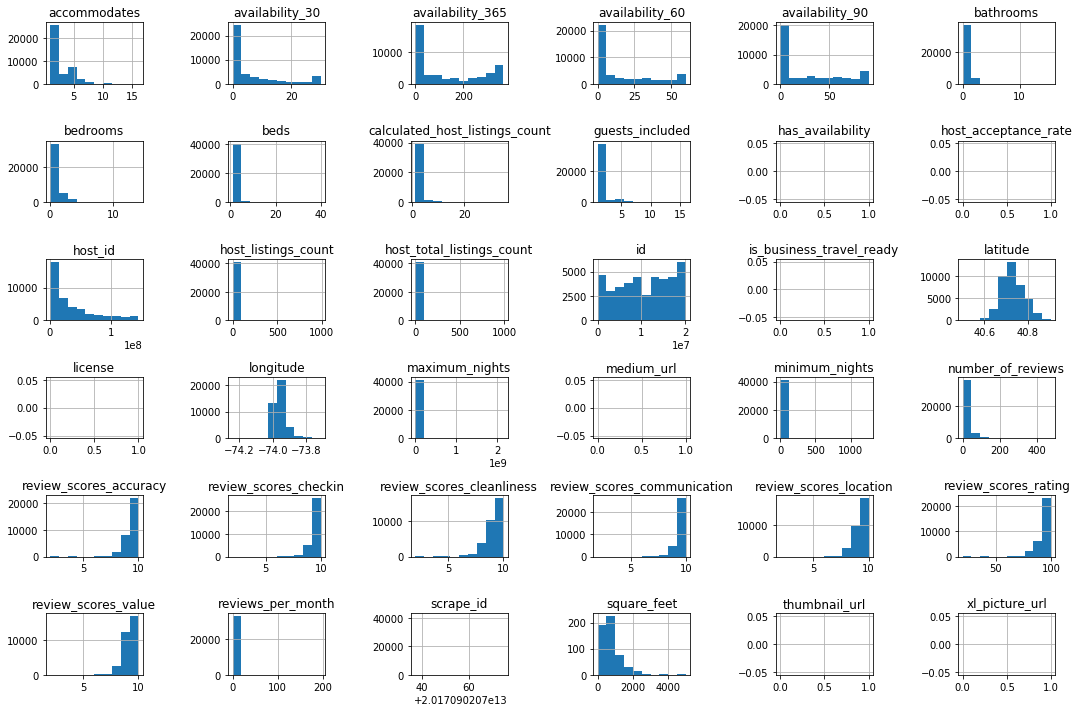

In [16]:
listings2017_df.hist(figsize=(15,10))
plt.tight_layout();

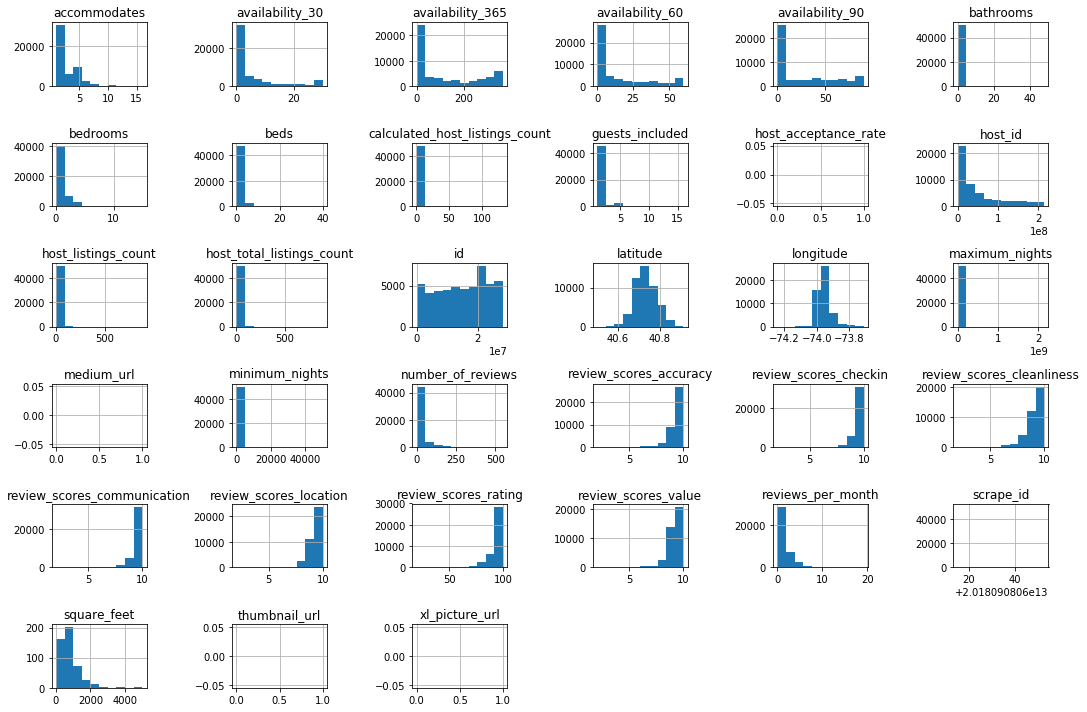

In [37]:
listings2018_df.hist(figsize=(15,10))
plt.tight_layout();

**ToDo:** 
Create a function that identifies the % of missing values in `listings_df` for both 2017 and 2018 by feature.

In [38]:
def find_nan_percent(df):
    df_nan_percent = pd.DataFrame((df.isnull().sum() / df.shape[0])).reset_index().sort_values(by=0,ascending=False)
    df_nan_percent = df_nan_percent.rename(columns={'index': 'feature', 0: '%_nan'})
    return df_nan_percent

In [41]:
listings2017_nan_percent = find_nan_percent(listings2017_df)
listings2017_nan_percent.head(10)

,feature,%_nan
15,thumbnail_url,1.000000
87,license,1.000000
70,has_availability,1.000000
27,host_acceptance_rate,1.000000
90,is_business_travel_ready,1.000000
18,xl_picture_url,1.000000
16,medium_url,1.000000
88,jurisdiction_names,0.999903
59,square_feet,0.986782
62,monthly_price,0.832617


In [42]:
listings2018_nan_percent = find_nan_percent(listings2018_df)
listings2018_nan_percent.head(10)

,feature,%_nan
15,thumbnail_url,1.000000
27,host_acceptance_rate,1.000000
18,xl_picture_url,1.000000
16,medium_url,1.000000
87,license,0.999861
88,jurisdiction_names,0.999542
59,square_feet,0.990442
62,monthly_price,0.872581
61,weekly_price,0.854182
10,notes,0.605157


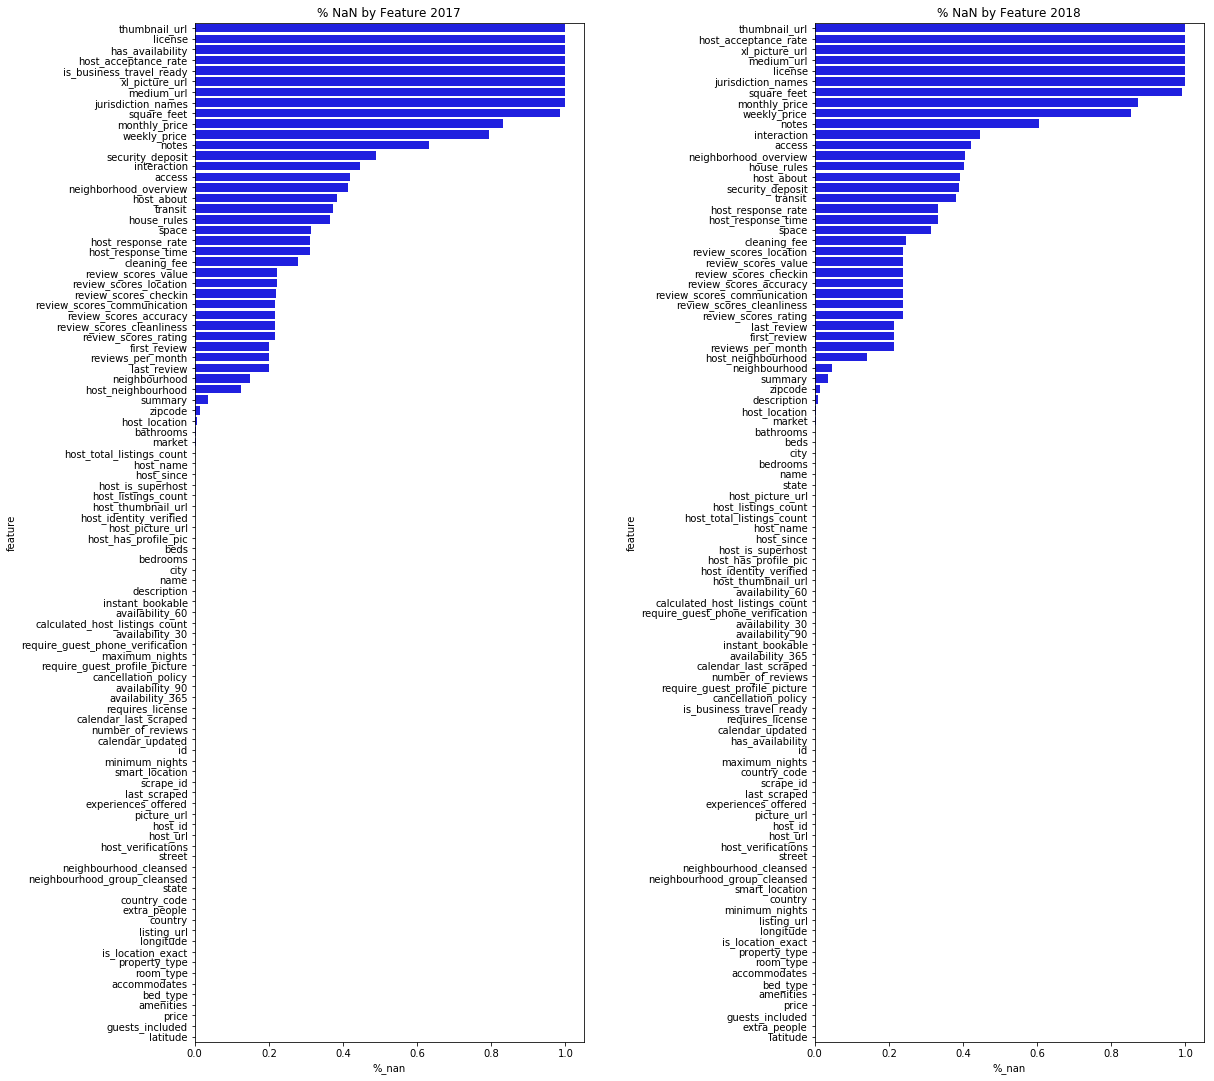

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
plt.tight_layout(pad=20)

sns.barplot(listings2017_nan_percent['%_nan'], listings2017_nan_percent['feature'], color='b', ax=ax1)
sns.barplot(listings2018_nan_percent['%_nan'], listings2018_nan_percent['feature'], color='b', ax=ax2)
ax1.set_title('% NaN by Feature 2017')
ax2.set_title('% NaN by Feature 2018');

Since `price` is the response variable in this analysis, I need to clean this feature up a little bit before I can explore it. Currently `price` is encoded as a string - I need to convert this to a float before I can explore it. This will be done during the Data Preperation phase.

## 3. Data Preparation

In [101]:
# Create copies of original datasets
calendar2017_df_new = calendar2017_df.copy()
calendar2018_df_new = calendar2018_df.copy()
listings2017_df_new = listings2017_df.copy()
listings2018_df_new = listings2018_df.copy()

#### 3.1 Select Data

> **calendar_df - To Clean**
- merge 2017 and 2018 data
- **date** - change type to datetime
- **available** - update type to boolean True/False
- **price** - change type to float

In [103]:
#Merge 2017 and 2018 'calendar' data
calendar_df_new = calendar2017_df_new.append(calendar2018_df_new)
calendar_df_new.head()

,listing_id,date,available,price
0,2515,2018-09-01,t,$89.00
1,2515,2018-05-08,t,$89.00
2,2515,2018-05-07,t,$89.00
3,2515,2018-05-06,t,$89.00
4,2515,2018-05-05,t,$89.00


In [104]:
#Merge 2017 and 2018 listings data
listings_df_new = listings2017_df_new.append(listings2018_df_new)
listings_df_new.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,17568601,https://www.airbnb.com/rooms/17568601,20170902070356,2017-09-03,Huge Sunny Room in Prime Brooklyn Flushing Ave JM,Hi there We occupy the entire first floor of a...,NaN,Hi there We occupy the entire first floor of a...,none,This is PRIME Bushwick area. 15 minute walk to...,...,f,NaN,NaN,f,NaN,flexible,f,f,1,1.03
1,14020260,https://www.airbnb.com/rooms/14020260,20170902070356,2017-09-03,1 Bedroom in north Bedstuy,"My place is close to king noodle, Bizarre, Hap...",NaN,"My place is close to king noodle, Bizarre, Hap...",none,NaN,...,f,NaN,NaN,t,NaN,moderate,f,f,1,0.55
2,422318,https://www.airbnb.com/rooms/422318,20170902070356,2017-09-03,NYC-Brooklyn #2 18 min to Manhattan,NaN,This private room is located in Brooklyn only ...,This private room is located in Brooklyn only ...,none,NaN,...,f,NaN,NaN,f,NaN,strict,f,f,7,2.04
3,1492856,https://www.airbnb.com/rooms/1492856,20170902070356,2017-09-03,small room in bedstuy 7,NaN,Hello! I'm renting a simple nice room in our 4...,Hello! I'm renting a simple nice room in our 4...,none,NaN,...,f,NaN,NaN,t,NaN,moderate,f,f,13,1.59
4,10571112,https://www.airbnb.com/rooms/10571112,20170902070356,2017-09-03,Comfy bed in a cozy home,Cool and comfortable two bedroom apartment ins...,NaN,Cool and comfortable two bedroom apartment ins...,none,NaN,...,f,NaN,NaN,f,NaN,flexible,f,f,1,NaN


#### 3.2 Clean Data

**ToDO:** - check for null values in `calendar_df_new` then see what values can be removed from the dataset

In [105]:
#Check for NaN values
calendar_df_new.isnull().sum()

listing_id           0
date                 0
available            0
price         22357537
dtype: int64

In [106]:
#Price is missing in all rows where 'availabe' = f 
#Remove rows where 'avilable' = f
calendar_df_new = calendar_df_new[calendar_df_new['available'] == 't']

In [107]:
calendar_df_new.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [108]:
calendar_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10995068 entries, 0 to 18330291
Data columns (total 4 columns):
listing_id    int64
date          object
available     object
price         object
dtypes: int64(1), object(3)
memory usage: 419.4+ MB


In [109]:
#Convert 'date' column to datetime type
calendar_df_new['date'] = pd.to_datetime(calendar_df_new['date'])

In [110]:
#Create function to break out month, day, and year from dates
def parse_date(df, date_field):
    '''
    Converts date field to datetime type then parses out year, month, day into separate columns
    
    INPUT - dataframe, date field
    OUTPUT - None
    '''
    df[date_field] = pd.to_datetime(df[date_field])
    df['year'], df['month'], df['day'] = (df[date_field].apply(lambda x: x.year), 
                                          df[date_field].apply(lambda x: x.month),
                                          df[date_field].apply(lambda x: x.day))

In [111]:
parse_date(calendar_df_new, 'date')

In [112]:
#Create function to convert t/f boolean values to 1/0
def bool_to_num(df, feat):
    '''
       Re-encodes boolean features from 't'/'f' to 1/0
       
       INPUT - dataframe, feature name
       OUTPUT - None
    '''
    df[feat] = df[feat].map({'t':1, 'f':0})

In [113]:
bool_to_num(calendar_df_new, 'available')

In [114]:
#Create function to convert 'price' column in calendar_df_new to float type
def price_to_float(df, price_field):
    '''
    Converts prices from $xx.xx object type to xx.xx float type
    
    INPUT - dataframe, price field
    OUTPUT - None
    '''
    df[price_field] = df[price_field].replace('[\$,]', '', regex=True).astype(float)

In [115]:
price_to_float(calendar_df_new, 'price')

In [116]:
calendar_df_new.head()

,listing_id,date,available,price,year,month,day
0,2515,2018-09-01,1,89.0,2018,9,1
1,2515,2018-05-08,1,89.0,2018,5,8
2,2515,2018-05-07,1,89.0,2018,5,7
3,2515,2018-05-06,1,89.0,2018,5,6
4,2515,2018-05-05,1,89.0,2018,5,5


**ToDo:** Since I would like to do some time series analysis on `calendar_df_new`, I want to add neighbourhood_group_cleansed from `listings_df_new` for added insights

In [119]:
listings_df_new = listings_df_new.rename(columns={"id": "listing_id"})
listings_df_new.head(1)

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,17568601,https://www.airbnb.com/rooms/17568601,20170902070356,2017-09-03,Huge Sunny Room in Prime Brooklyn Flushing Ave JM,Hi there We occupy the entire first floor of a...,NaN,Hi there We occupy the entire first floor of a...,none,This is PRIME Bushwick area. 15 minute walk to...,...,f,NaN,NaN,f,NaN,flexible,f,f,1,1.03


In [120]:
#Add neighborhood_group to listings_df
calendar_df_new = pd.merge(calendar_df_new,listings_df_new[['listing_id','neighbourhood_group_cleansed']],on='listing_id')
calendar_df_new.head()

,listing_id,date,available,price,year,month,day,neighbourhood_group_cleansed
0,2515,2018-09-01,1,89.0,2018,9,1,Manhattan
1,2515,2018-09-01,1,89.0,2018,9,1,Manhattan
2,2515,2018-05-08,1,89.0,2018,5,8,Manhattan
3,2515,2018-05-08,1,89.0,2018,5,8,Manhattan
4,2515,2018-05-07,1,89.0,2018,5,7,Manhattan


>**listings_df - To Clean**
- **Drop the folowing fields**
    - Any fields with > 50% NaN values
- **Drop the folowing rows** 
    - Any rows with > 30% NaN values
    - Any rows with missing 'review_scores_rating'
- **price** - change type to float
- **security_deposit** - change type to float
- **cleaning_fee** - change type to float

In [121]:
calendar_df_new['listing_id'] = calendar_df_new['listing_id'].astype(str)

In [122]:
# Identify features with > 50% nan
listings_df_feat_to_remove = listings_nan_df[listings_nan_df['%_nan'] > 0.5]

In [123]:
listings_df_feat_to_remove

,feature,%_nan
15,thumbnail_url,1.000000
27,host_acceptance_rate,1.000000
18,xl_picture_url,1.000000
16,medium_url,1.000000
87,license,0.999861
88,jurisdiction_names,0.999542
59,square_feet,0.990442
62,monthly_price,0.872581
61,weekly_price,0.854182
10,notes,0.605157


In [124]:
# Drop features with > 50% nan from listings_df_new
listings_df_new = listings_df_new.drop(list(listings_df_feat_to_remove['feature']), axis=1)

In [125]:
listings_df_new.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,17568601,https://www.airbnb.com/rooms/17568601,20170902070356,2017-09-03,Huge Sunny Room in Prime Brooklyn Flushing Ave JM,Hi there We occupy the entire first floor of a...,NaN,Hi there We occupy the entire first floor of a...,none,This is PRIME Bushwick area. 15 minute walk to...,...,10.0,10.0,f,f,NaN,flexible,f,f,1,1.03
1,14020260,https://www.airbnb.com/rooms/14020260,20170902070356,2017-09-03,1 Bedroom in north Bedstuy,"My place is close to king noodle, Bizarre, Hap...",NaN,"My place is close to king noodle, Bizarre, Hap...",none,NaN,...,8.0,9.0,f,t,NaN,moderate,f,f,1,0.55
2,422318,https://www.airbnb.com/rooms/422318,20170902070356,2017-09-03,NYC-Brooklyn #2 18 min to Manhattan,NaN,This private room is located in Brooklyn only ...,This private room is located in Brooklyn only ...,none,NaN,...,8.0,9.0,f,f,NaN,strict,f,f,7,2.04
3,1492856,https://www.airbnb.com/rooms/1492856,20170902070356,2017-09-03,small room in bedstuy 7,NaN,Hello! I'm renting a simple nice room in our 4...,Hello! I'm renting a simple nice room in our 4...,none,NaN,...,9.0,9.0,f,t,NaN,moderate,f,f,13,1.59
4,10571112,https://www.airbnb.com/rooms/10571112,20170902070356,2017-09-03,Comfy bed in a cozy home,Cool and comfortable two bedroom apartment ins...,NaN,Cool and comfortable two bedroom apartment ins...,none,NaN,...,NaN,NaN,f,f,NaN,flexible,f,f,1,NaN


In [126]:
# Divide the data into two subsets based on the number of missing values in each row.
listings_df_new['nan_sum'] = np.where((listings_df_new.isnull().sum(axis=1) / listings_df_new.shape[1]) > 0.3, 'high_nan_count', 'low_nan_count')

In [127]:
listings_df_new['nan_sum'].value_counts()

low_nan_count     91322
high_nan_count       55
Name: nan_sum, dtype: int64

In [128]:
listings_df_new = listings_df_new[listings_df_new['nan_sum'] == 'low_nan_count']

In [129]:
listings_df_new = listings_df_new.drop('nan_sum', axis=1)

In [130]:
# Convert 'price' columns to float types
listings_price_fields = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']

for field in listings_price_fields:
    price_to_float(listings_df_new, field)

In [131]:
#Create list of boolean features then convert values to numeric values
listings_feat_bool_to_num = ['host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'has_availability',
                             'requires_license', 'instant_bookable', 'is_business_travel_ready', 'require_guest_phone_verification',
                             'require_guest_profile_picture', 'host_is_superhost']

for feat in listings_feat_bool_to_num:
    bool_to_num(listings_df_new, feat)

In [132]:
listings_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91322 entries, 0 to 50219
Data columns (total 86 columns):
listing_id                          91322 non-null int64
listing_url                         91322 non-null object
scrape_id                           91322 non-null int64
last_scraped                        91322 non-null object
name                                91272 non-null object
summary                             87957 non-null object
space                               62609 non-null object
description                         90877 non-null object
experiences_offered                 91322 non-null object
neighborhood_overview               53893 non-null object
transit                             56915 non-null object
access                              52917 non-null object
interaction                         50634 non-null object
house_rules                         56030 non-null object
picture_url                         91322 non-null object
host_id                

In [133]:
#Create list of categorical features
listings_categorical = ['host_response_time', 'neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'property_type',
                        'room_type', 'bed_type']

In [134]:
#Create list of features to remove from analysis
#These features include information I find not necessary for the questions I have
listings_df_feat_to_remove = ['last_scraped', 'experiences_offered', 'picture_url', 'calendar_updated', 'listing_url', 'scrape_id', 'host_url',
                              'host_thumbnail_url', 'host_picture_url', 'host_since', 'listing_id', 'host_id']

listings_df_new = listings_df_new.drop(listings_df_feat_to_remove, axis=1)

In [135]:
#Create list of text features to remove
#Though some of these features may have an impact on predicting price, NLP will not be used in this analysis
listings_df_text_feat = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 'transit', 'access',
                         'interaction', 'house_rules', 'host_location', 'host_about', 'street', 'state', 'country',
                         'amenities', 'calendar_last_scraped', 'first_review', 'last_review', 'host_name', 'host_verifications']

listings_df_new = listings_df_new.drop(listings_df_text_feat, axis=1)

In [136]:
#Convert host_response_rate to float
listings_df_new['host_response_rate'] = listings_df_new['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)

In [137]:
listings_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91322 entries, 0 to 50219
Data columns (total 54 columns):
host_response_time                  61803 non-null object
host_response_rate                  61803 non-null float64
host_is_superhost                   91266 non-null float64
host_neighbourhood                  79091 non-null object
host_listings_count                 91266 non-null float64
host_total_listings_count           91266 non-null float64
host_has_profile_pic                91266 non-null float64
host_identity_verified              91266 non-null float64
neighbourhood                       82849 non-null object
neighbourhood_cleansed              91322 non-null object
neighbourhood_group_cleansed        91322 non-null object
city                                91224 non-null object
zipcode                             90049 non-null object
market                              91049 non-null object
smart_location                      91322 non-null object
country_code   

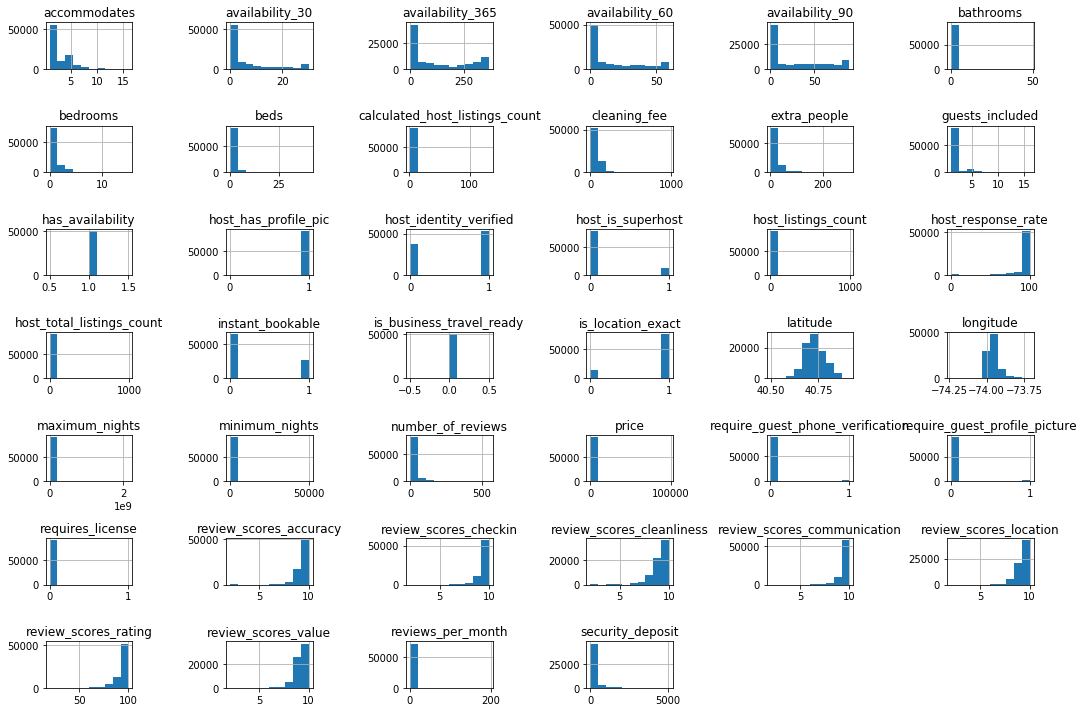

In [138]:
listings_df_new.hist(figsize=(15,10))
plt.tight_layout();

'price' seems to be heavily skewed to the right due to some outliers. I am going to remove the outliers to try to get a more normal distribution of values for 'price'

In [139]:
# Adjust listings_df_new to include only the top 99% of values for 'price' to remove outliers
listings_df_new = listings_df_new[listings_df_new['price'] < listings_df_new['price'].quantile(0.99)]

In [140]:
listings_df_new.shape

(90318, 54)

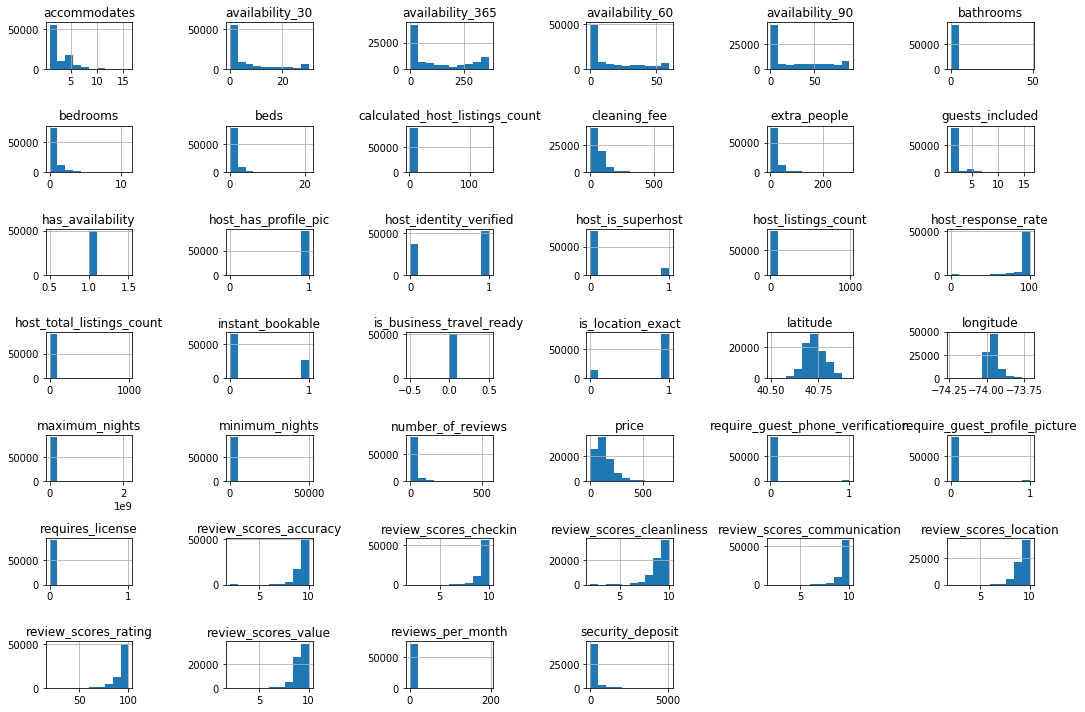

In [141]:
listings_df_new.hist(figsize=(15,10))
plt.tight_layout();

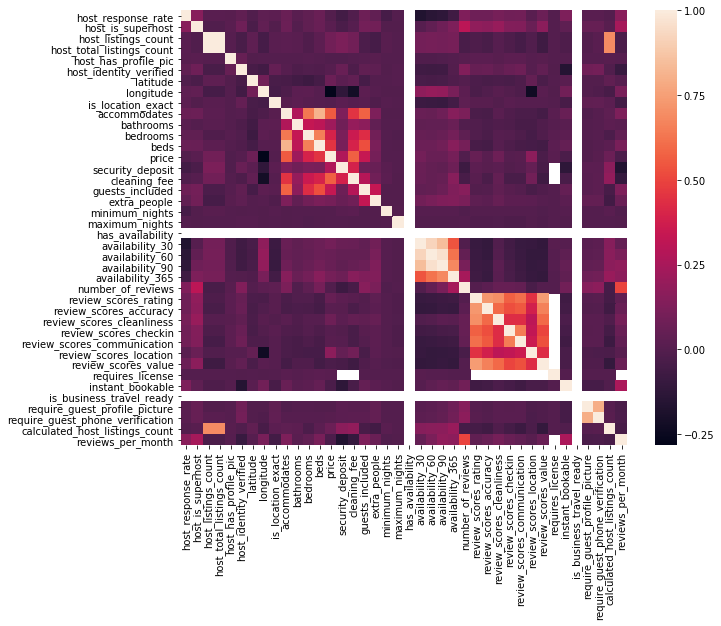

In [142]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(listings_df_new.corr(),xticklabels=True, yticklabels=True, ax=ax);

In [143]:
#Create categorical groups for review_scores_rating
#This will make it easier to view this data visually in graphs
listings_df_new['review_scores_rating_grouped'] = pd.cut(x=listings_df_new['review_scores_rating'], bins=8,
                                                         labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']).values.add_categories('N/A')
listings_df_new['review_scores_rating_grouped'] = listings_df_new['review_scores_rating_grouped'].fillna('N/A')

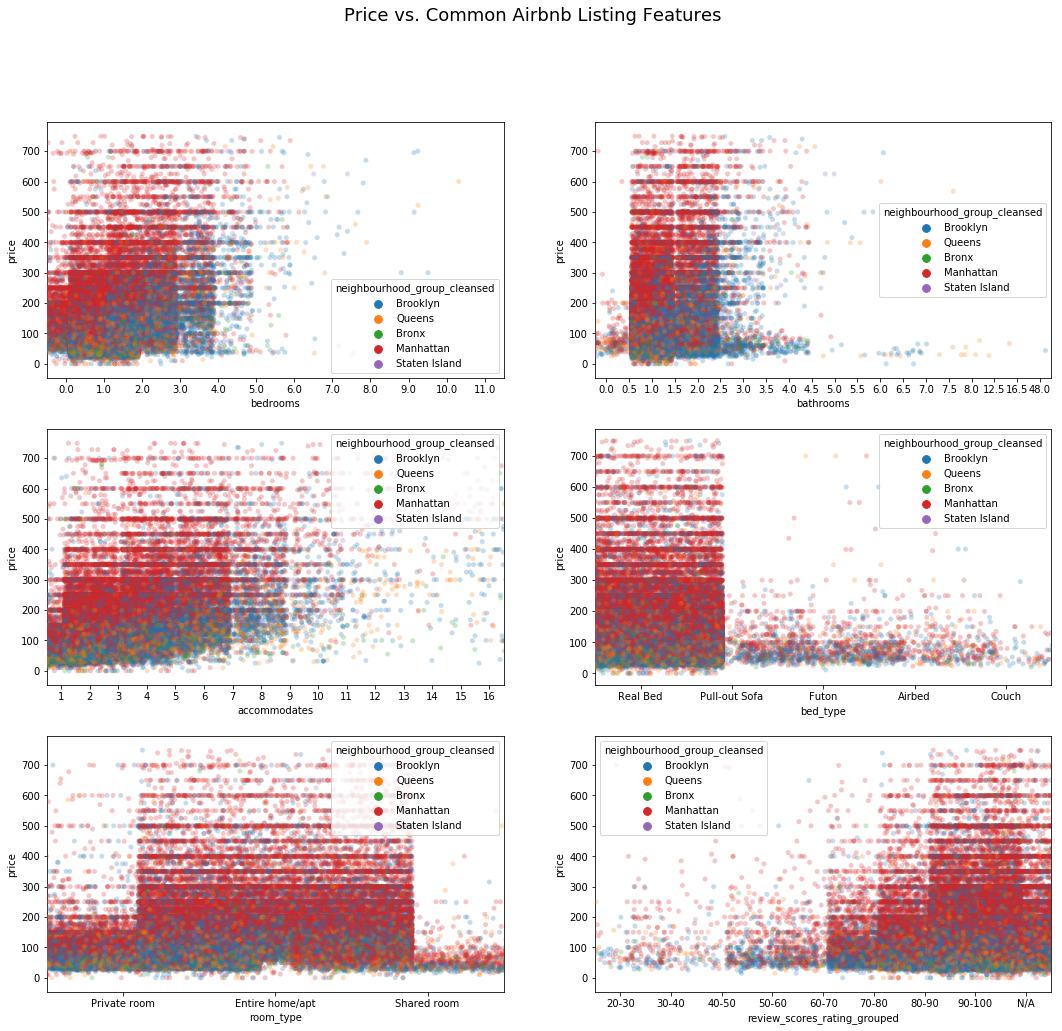

In [144]:
fig,axes = plt.subplots(3, 2,figsize=(18,16))
fig.suptitle('Price vs. Common Airbnb Listing Features', fontsize=18)
axes[0,0] = sns.stripplot(x='bedrooms', y='price', hue='neighbourhood_group_cleansed',
                          data=listings_df_new, alpha=0.25, jitter=0.9, ax=axes[0,0])
axes[0,1] = sns.stripplot(x='bathrooms', y='price', hue='neighbourhood_group_cleansed',
                          data=listings_df_new, alpha=0.25, jitter=0.9, ax=axes[0,1]);
axes[1,0] = sns.stripplot(x='accommodates', y='price', hue='neighbourhood_group_cleansed', 
                          data=listings_df_new, alpha=0.25, jitter=0.9, ax=axes[1,0])
axes[1,1] = sns.stripplot(x='bed_type', y='price', hue='neighbourhood_group_cleansed', 
                          data=listings_df_new, alpha=0.25, jitter=0.9, ax=axes[1,1])
axes[2,0] = sns.stripplot(x='room_type', y='price', hue='neighbourhood_group_cleansed', 
                          data=listings_df_new, alpha=0.25, jitter=0.9, ax=axes[2,0])
axes[2,1] = sns.stripplot(x='review_scores_rating_grouped', y='price', hue='neighbourhood_group_cleansed',
                          data=listings_df_new, alpha=0.25, jitter=0.9, ax=axes[2,1]);

plt.savefig('price_vs_scatters.png', dpi=100)

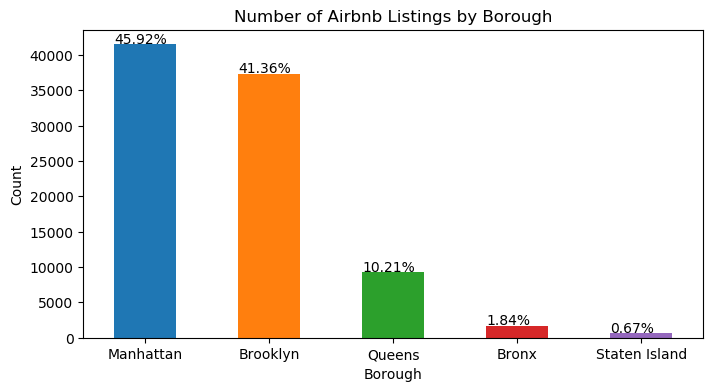

In [145]:
with plt.style.context(('default')):
    fig, ax = plt.subplots(figsize=(8,4))
    listings_df_new['neighbourhood_group_cleansed'].value_counts().plot(kind='bar')
    plt.title('Number of Airbnb Listings by Borough')
    ax.set_xlabel('Borough')
    ax.set_ylabel('Count')
    plt.xticks(rotation='horizontal')
    
    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x(), i.get_height()+200, \
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=10)
    
    plt.savefig('listings_by_borough.png', dpi=100)

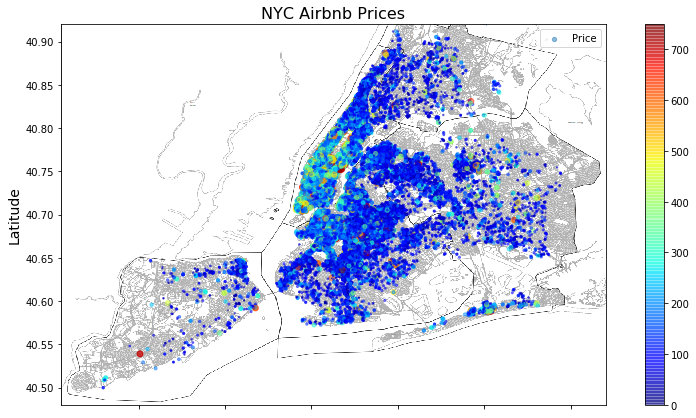

In [146]:
nyc_img = mpimg.imread('nyc-base-map.png')
ax = listings_df_new.plot(kind="scatter", x='longitude', y='latitude', figsize=(14,7),
                        s=listings_df_new['price']/20, label="Price",
                        c=listings_df_new['price'], cmap='jet',
                        colorbar=True, alpha=0.5,
                      )
plt.imshow(nyc_img, extent=[-74.29, -73.66, 40.48, 40.92], alpha=0.8)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('NYC Airbnb Prices', fontsize=16);

plt.savefig('nyc_map_prices.png', dpi=100)

In [147]:
calendar_df_new_by_day = calendar_df_new.groupby(['neighbourhood_group_cleansed','date'], as_index=False).median()
calendar_df_new_by_day.head()

,neighbourhood_group_cleansed,date,available,price,year,month,day
0,Bronx,2017-09-02,1,87.5,2017,9,2
1,Bronx,2017-09-03,1,80.0,2017,9,3
2,Bronx,2017-09-04,1,75.0,2017,9,4
3,Bronx,2017-09-05,1,75.0,2017,9,5
4,Bronx,2017-09-06,1,75.0,2017,9,6


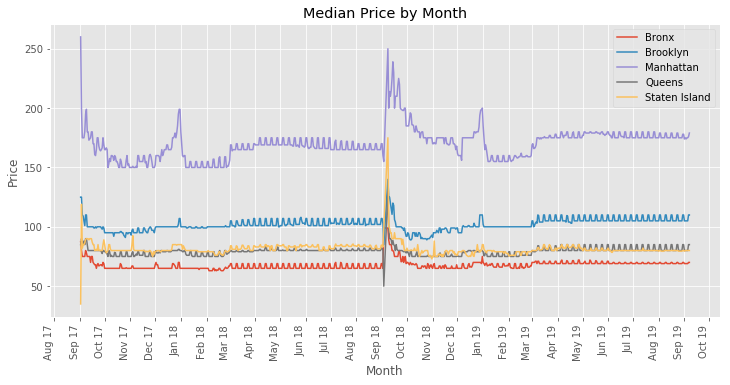

In [148]:
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(12,6))

    for key, data in calendar_df_new_by_day.groupby('neighbourhood_group_cleansed'):
        data.plot(x='date', y='price', ax=ax, label=key)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
    plt.xticks(rotation='vertical')
    ax.set_xlabel('Month')
    ax.set_ylabel('Price')
    ax.set_title('Median Price by Month');
    
    plt.savefig('price_by_month.png', dpi=100)

## 4. Modeling

We are trying to make predictions on 'price', which is a continuous variable, so I will be creating a Linear Regression model.

Before I build the model, I still need to prepare the data so it will play nice with the Linear Regression model within sci-kit learn. Since there are many variables in `listings_df_new` that are skewed either to the right or left, I will first attempt to normalize these distributions by applying a log transformation.

In [149]:
skewed = ['bathrooms', 'bedrooms', 'beds', 'calculated_host_listings_count', 'cleaning_fee', 'extra_people', 'guests_included',
          'host_listings_count', 'host_response_rate', 'host_total_listings_count', 'maximum_nights', 'minimum_nights',
          'number_of_reviews', 'review_scores_rating', 'reviews_per_month', 'security_deposit']

In [150]:
listings_df_feat_log_trans = pd.DataFrame(data = listings_df_new)
listings_df_feat_log_trans[skewed] = listings_df_new[skewed].apply(lambda x: np.log(x + 1))

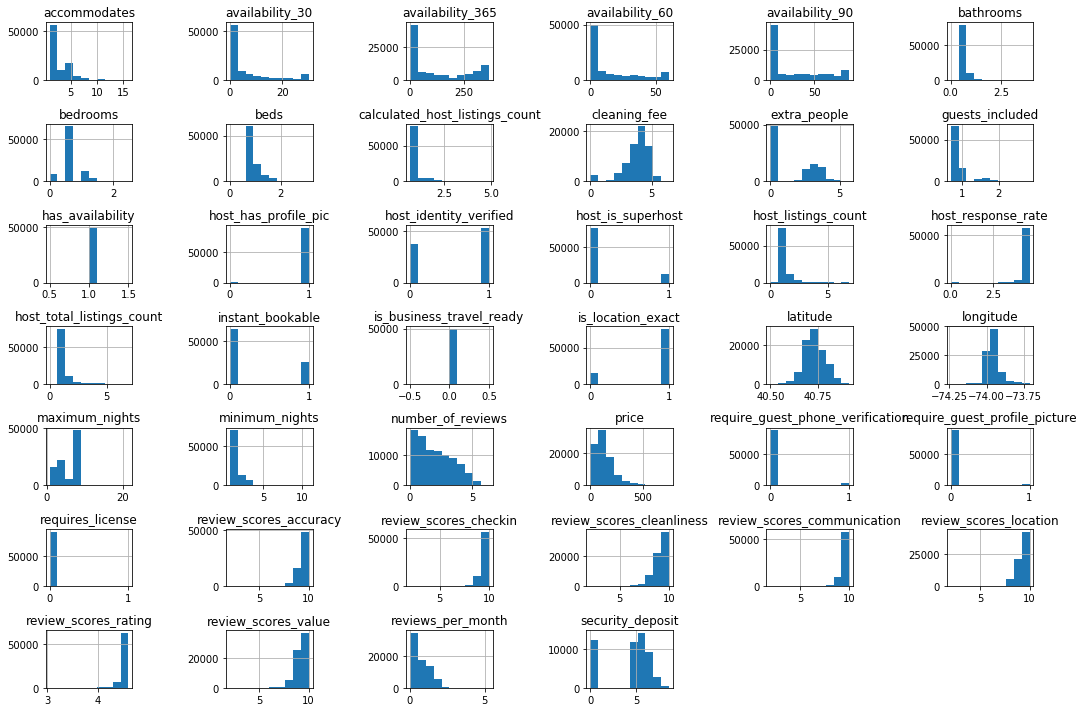

In [151]:
listings_df_feat_log_trans.hist(figsize=(15,10))
plt.tight_layout();

In [152]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no prices
    2. Create X as all the columns that are not the 'price' column
    3. Create y as the 'price' column
    4. Drop the 'price' column from X
    5. For each numeric variable in X, fill the NaN with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['price'], axis=0)
    y = df['price']
    
    #Drop respondent and expected salary columns
    df = df.drop(['price', 'review_scores_rating_grouped'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object', 'category']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(listings_df_feat_log_trans) 

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [154]:
#Instanitate
lm_model = LinearRegression(normalize=True)
#Fit
lm_model.fit(X_train, y_train)
#Predict
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
#Score
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [155]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

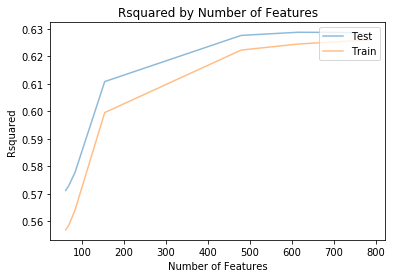

In [156]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [157]:
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

615
0.6287869327775606
0.6245049196657725


In [158]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
18,has_availability,-8.049426e+15,8.049426e+15
580,"smart_location_Jamaica, NY",-3.562329e+15,3.562329e+15
369,city_Jamaica,3.562329e+15,3.562329e+15
370,city_Long Island City,2.246789e+15,2.246789e+15
581,"smart_location_Long Island City, NY",-2.246789e+15,2.246789e+15
583,"smart_location_New York , NY",9.511222e+14,9.511222e+14
372,city_New York,-9.511222e+14,9.511222e+14
579,"smart_location_Flushing, NY",-7.873646e+14,7.873646e+14
367,city_Flushing,7.873646e+14,7.873646e+14
362,city_Astoria,7.074503e+14,7.074503e+14


Since my train and test scores are only around 62%, it looks like some of the text features I removed from the data may have had a sizable impact on price. Since NLP is not used in this analysis, I will gain a majority of of insights from descriptive statistics and visualizations.